In [1]:
import os
import sys

import pandas as pd
from sklearn.metrics import roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

src_dir = os.path.abspath('../')
if src_dir not in sys.path:
    sys.path.insert(0, src_dir)

import common
import preprocessing

In [2]:
params =  {'vocab_size': 30000, 'max_len': 300}
preprocessed_data = preprocessing.load(params)

2018-03-01 00:57:30 Loading preprocessing/max-len=300_vocab-size=30000


In [3]:
name = 'rnn'
random_seed = 9144
params_str = 'batch-size=128_dense-dropout=0.3_dense-layers=1_lr-high=0.5_lr-low=0.01_max-len=300_rnn-dropout=0.2_rnn-size=500_vectors=glove.42B.300d_vocab-size=30000'
validation_results = pd.read_csv(os.path.join(src_dir, 'output', name, str(random_seed), params_str, 'validation.csv'))
validation_results = validation_results.sort_values('id')
validation_results.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
25896,000103f0d9cfb60f,0.000108,3.579399e-07,0.000022,7.877796e-07,0.000008,0.000002
17802,000113f07ec002fd,0.000464,5.299522e-07,0.000030,1.444692e-06,0.000021,0.000002
30632,0001d958c54c6e35,0.000429,1.474458e-06,0.000034,3.876096e-06,0.000069,0.000003
37320,0002bcb3da6cb337,0.998661,3.257914e-01,0.992735,1.255392e-03,0.861321,0.007902
34282,00040093b2687caa,0.000090,9.471520e-07,0.000045,1.558710e-06,0.000016,0.000006


In [4]:
correct_results = common.load_data(random_seed, 'validation')
correct_results = correct_results.sort_values('id')
correct_results.head()

id  toxic  severe_toxic  obscene  threat  insult  \
0  1  000103f0d9cfb60f      0             0        0       0       0   
   2  000113f07ec002fd      0             0        0       0       0   
   4  0001d958c54c6e35      0             0        0       0       0   
36 6  0002bcb3da6cb337      1             1        1       0       1   
0  9  00040093b2687caa      0             0        0       0       0   

      identity_hate  
0  1              0  
   2              0  
   4              0  
36 6              0  
0  9              0

In [5]:
assert (validation_results['id'].values == correct_results['id'].values).all()

## ROC AUC

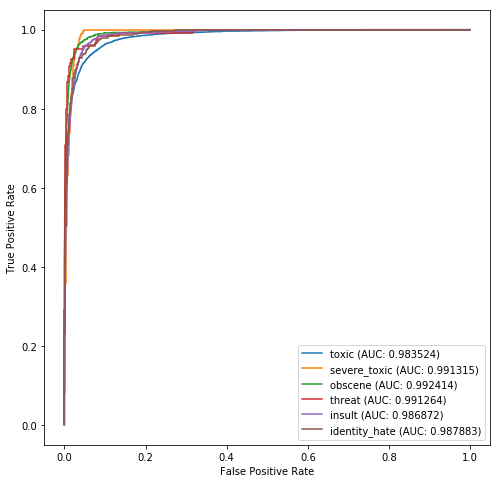

In [6]:
plt.figure(figsize=(8, 8))
for label in common.LABELS:
    fpr, tpr, thresholds = roc_curve(correct_results[label], validation_results[label])
    plt.plot(fpr, tpr, label='{} (AUC: {:.6f})'.format(label, auc(fpr, tpr)))   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

## Precision-Recall

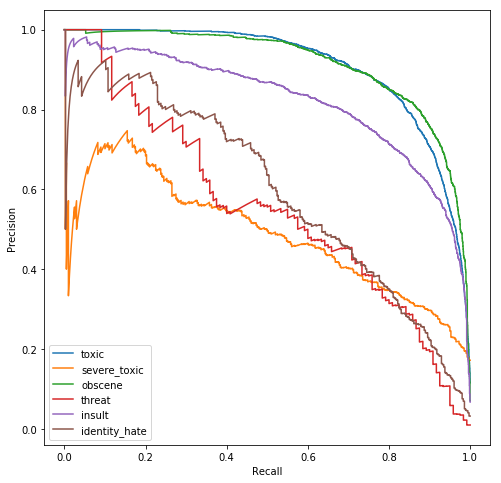

In [7]:
plt.figure(figsize=(8, 8))
for label in common.LABELS:
    precision, recall, thresholds = precision_recall_curve(correct_results[label], validation_results[label])
    plt.plot(recall, precision, label=label)   
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
# plt.xlim([0, 0.1])

## Examples

Negative examples with the highest scores.

In [ ]:
num_examples = 5

for label in common.LABELS:
    df = validation_results[['id', label]]
    df = df.merge(correct_results, on='id', suffixes=('_score', '_correct'))
    df = df[['id', label + '_score', label + '_correct']]
    df = df[df[label + '_correct'] == 0]
    df = df.nlargest(num_examples, label + '_score')
    print(label.center(80, '=') + '\n')
    for id_ in df['id']:
        print('{}:'.format(id_), preprocessed_data[id_], '\n')

Positive examples with the lowest scores.

In [ ]:
num_examples = 5

for label in common.LABELS:
    df = validation_results[['id', label]]
    df = df.merge(correct_results, on='id', suffixes=('_score', '_correct'))
    df = df[['id', label + '_score', label + '_correct']]
    df = df[df[label + '_correct'] == 1]
    df = df.nsmallest(num_examples, label + '_score')
    print(label.center(80, '=') + '\n')
    for id_ in df['id']:
        print('{}:'.format(id_), preprocessed_data[id_], '\n')